<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220921_MNIST_%EC%8B%A4%EC%8A%B502_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive /mydrive

In [ ]:
%cd /mydrive

/content/drive/MyDrive


In [ ]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __CNN Layer 구조 변경 & 드롭아웃 일괄적용__
---
epoch수를 늘리고 callback함수를 넣되 patience 횟수를 키운다.

SGD, adam, rmsprop 각 optimizer별 batch_size를 변경해볼 것

### **1. Library Import**

In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __모델 변경__

---
CNN 특성 및 MNIST 자료 특성을 고려할 때, 초기의 세부적인 데이터 정보보다 여러 필터를 거치고난 후의 구조적인 특징정보가 판단에 더 중요할 것이라고 가정하고 출력층에 가까울수록 필터 수를 점점 키워나가는 방식으로 수정

Dropout 추가 (64-0.2, 128-0.5)
epoch=100 EarlyStop patient = 10으로 키워서 진행해본다. 

#### __1. batch_size=128, 출력 직전층 activation='sigmoid', optimizer='SGD'__ 

In [ ]:
import keras

In [ ]:
model_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model_1.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/model_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1 = model_1.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
368/375 [============================>.] - ETA: 0s - loss: 2.2999 - accuracy: 0.1464
Epoch 1: val_accuracy improved from -inf to 0.19867, saving model to mnist/model_1.h2
375/375 [==============================] - 17s 16ms/step - loss: 2.2992 - accuracy: 0.1480 - val_loss: 2.2623 - val_accuracy: 0.1987
Epoch 2/100
372/375 [============================>.] - ETA: 0s - loss: 2.1469 - accuracy: 0.3433
Epoch 2: val_accuracy improved from 0.19867 to 0.62583, saving model to mnist/model_1.h2
375/375 [==============================] - 3s 8ms/step - loss: 2.1451 - accuracy: 0.3440 - val_loss: 1.8372 - val_accuracy: 0.6258
Epoch 3/100
371/375 [============================>.] - ETA: 0s - loss: 1.5217 - accuracy: 0.5780
Epoch 3: val_accuracy improved from 0.62583 to 0.76025, saving model to mnist/model_1.h2
375/375 [==============================] - 3s 8ms/step - loss: 1.5189 - accuracy: 0.5787 - val_loss: 0.9887 - val_accuracy: 0.7602
Epoch 4/100
368/375 [============================>

In [ ]:
result = model_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9874

테스트 정확도: 0.9874


In [ ]:
loaded_model = load_model('mnist/model_2.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9868

불러온 모델 테스트 정확도: 0.9868


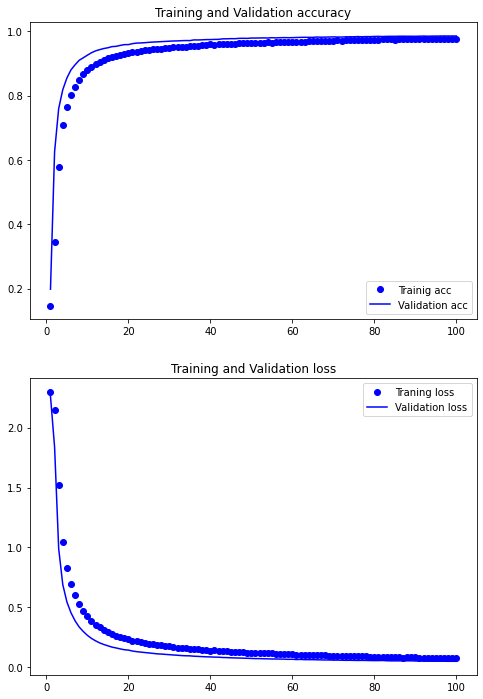

In [ ]:
acc = hist_1.history['accuracy']
val_acc = hist_1.history['val_accuracy']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df = pd.DataFrame([['CNN', 'model_1', '32(relu)-64(drop0.2/relu)-128(drop0.5/relu)-Flatten-64(sigmoid)-10(softmax)]', 'SGD', 100, 128, 0.2, 'es/mc', 
                    "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])

#### __2. batch_size=128, 출력 직전층 activation='sigmoid', optimizer='rmsprop'__ 

In [ ]:
model_1_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [ ]:
model_1_1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/model_2_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
373/375 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8811
Epoch 1: val_accuracy improved from -inf to 0.96925, saving model to mnist/model_1_1.h2
375/375 [==============================] - 6s 15ms/step - loss: 0.4401 - accuracy: 0.8815 - val_loss: 0.1055 - val_accuracy: 0.9693
Epoch 2/100
371/375 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9668
Epoch 2: val_accuracy improved from 0.96925 to 0.98150, saving model to mnist/model_1_1.h2
375/375 [==============================] - 4s 9ms/step - loss: 0.1125 - accuracy: 0.9668 - val_loss: 0.0642 - val_accuracy: 0.9815
Epoch 3/100
373/375 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9756
Epoch 3: val_accuracy improved from 0.98150 to 0.98458, saving model to mnist/model_1_1.h2
375/375 [==============================] - 3s 9ms/step - loss: 0.0803 - accuracy: 0.9756 - val_loss: 0.0524 - val_accuracy: 0.9846
Epoch 4/100
372/375 [========================

In [ ]:
result = model_1_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9939

테스트 정확도: 0.9939


In [ ]:
loaded_model = load_model('mnist/model_2_1.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9935

불러온 모델 테스트 정확도: 0.9935


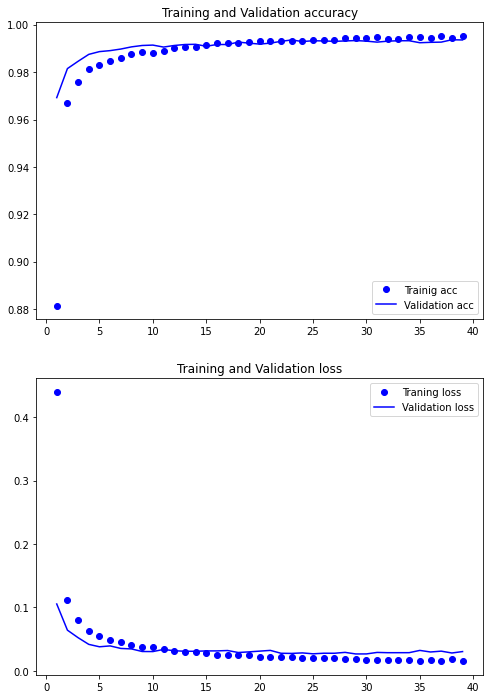

In [ ]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']
loss = hist_1_1.history['loss']
val_loss = hist_1_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df.loc[1]=['CNN', 'model_1_1', '32(relu/drop0.2)-64(relu/drop0.2)-128(relu/drop0.5)-Flatten-64(sigmoid)-10(softmax)]', 'rmsprop', 100, 128, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

#### __3.  batch_size=128, 출력 직전층 activation='sigmoid', optimizer='adam'__ 

In [ ]:
model_1_2 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [ ]:
model_1_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h2'
mc = ModelCheckpoint('mnist/model_2_2.h5', monitor='val_accuracy', mode='max', verbose=1)
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
371/375 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.8568
Epoch 1: val_accuracy improved from -inf to 0.97283, saving model to mnist/model_1_2.h2
375/375 [==============================] - 6s 15ms/step - loss: 0.5186 - accuracy: 0.8579 - val_loss: 0.1104 - val_accuracy: 0.9728
Epoch 2/100
367/375 [============================>.] - ETA: 0s - loss: 0.1231 - accuracy: 0.9669
Epoch 2: val_accuracy improved from 0.97283 to 0.98258, saving model to mnist/model_1_2.h2
375/375 [==============================] - 4s 10ms/step - loss: 0.1225 - accuracy: 0.9670 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 3/100
371/375 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9768
Epoch 3: val_accuracy improved from 0.98258 to 0.98583, saving model to mnist/model_1_2.h2
375/375 [==============================] - 3s 9ms/step - loss: 0.0836 - accuracy: 0.9769 - val_loss: 0.0486 - val_accuracy: 0.9858
Epoch 4/100
369/375 [=======================

In [ ]:
result = model_1_2.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9947

테스트 정확도: 0.9947


In [ ]:
loaded_model = load_model('mnist/model_2_2.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9929

불러온 모델 테스트 정확도: 0.9929


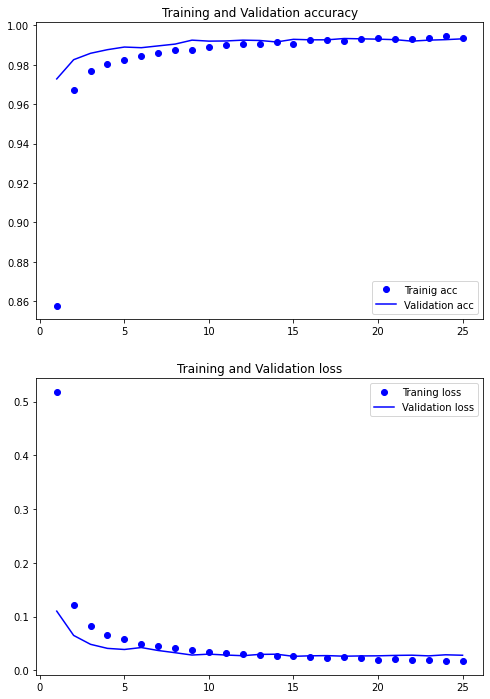

In [ ]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']
loss = hist_1_2.history['loss']
val_loss = hist_1_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df.loc[2]=['CNN', 'model_1_2', '32(relu/drop0.2)-64(relu/drop0.2)-128(relu/drop0.5)-Flatten-64(sigmoid)-10(softmax)]', 'adam', 100, 128, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

In [ ]:
df.head()

,모델,Name,Structure,Optimizer,epochs,batch_size,validation_split,callback,Accuracy,MC_Accuracy,Loss,MC_Loss
0,CNN,model_1,32(relu)-64(drop0.2/relu)-128(drop0.5/relu)-Fl...,SGD,100,128,0.2,es/mc,0.9874,0.9868,0.0399,0.0409
1,CNN,model_1_1,32(relu/drop0.2)-64(relu/drop0.2)-128(relu/dro...,rmsprop,100,128,0.2,es/mc,0.9939,0.9935,0.0267,0.0238
2,CNN,model_1_2,32(relu/drop0.2)-64(relu/drop0.2)-128(relu/dro...,adam,100,128,0.2,es/mc,0.9947,0.9929,0.0188,0.0224


In [ ]:
df.to_csv("./mnist/220921_실습_2_1.csv", header=True, sep=',', na_rep='NaN', float_format = '%.4f', encoding='utf-8-sig', line_terminator='\n')

__Best Model Save__

---
ModelCheckpoint로 저장된 모델에 비해 최종 모델의 val_acc가 낮음에도 테스트데이터에 대한 acc가 높은 것으로 보아, 검증데이터에 대해서도 과대적합이 발생하였음을 유추할 수 있음.

In [ ]:
model_1_2.save("mnist/best_model")

In [ ]:
loaded_model = load_model('mnist/best_model')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [ ]:
loaded_model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0188 - accuracy: 0.9947


[0.018777184188365936, 0.994700014591217]